In [1]:
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv("/content/gdrive/MyDrive/DAML-Practical test/OneMedic_Train.csv")
df2 = pd.read_csv("/content/gdrive/MyDrive/DAML-Practical test/OneMedic_Test.csv")

In [3]:
df1.head(10)

,OutletIdentifier,OutletEstablishmentYear,PopularServices,AveragePatientPerDay,B40PatientPerDay,OutletSize,OutletLocation,OutletType,OutletSalesPerHour
0,OUT049,1999,minor illnesses,250,9.0,Medium,Melaka Tengah,HQ Clinic,3735.14
1,OUT018,2009,basic laboratory testing,48,6.0,Medium,Masjid Tanah,Klinik Keluarga,443.42
2,OUT049,1999,health screenings,142,18.0,Medium,Melaka Tengah,HQ Clinic,2097.27
3,OUT010,1998,Vaccination,182,19.0,NaN,Masjid Tanah,Pharmarcy,732.38
4,OUT013,1987,Medical Checkup,54,9.0,High,Masjid Tanah,HQ Clinic,994.71
5,OUT018,2009,Consultation,51,10.0,Medium,Masjid Tanah,Klinik Keluarga,556.61
6,OUT013,1987,Medical Certificate,58,14.0,High,Masjid Tanah,HQ Clinic,343.55
7,OUT027,1985,Medical Certificate,108,NaN,Medium,Masjid Tanah,Klinik 24 jam,4022.76
8,OUT045,2002,Injuries treatment,97,16.0,NaN,Alor Gajah,HQ Clinic,1076.60
9,OUT017,2007,Injuries treatment,188,19.0,NaN,Alor Gajah,HQ Clinic,4710.54


In [4]:
df2.head(10)

,OutletIdentifier,OutletEstablishmentYear,PopularServices,AveragePatientPerDay,B40PatientPerDay,OutletSize,OutletLocation,OutletType,OutletSalesPerHour
0,OUT049,1999,Minor Illness,108,21.0,Medium,Melaka Tengah,HQ Clinic,107.86
1,OUT017,2007,basic laboratory testing,87,8.0,NaN,Masjid Tanah,HQ Clinic,87.32
2,OUT010,1998,Others,242,15.0,NaN,Alor Gajah,Pharmarcy,241.75
3,OUT017,2007,Minor Illness,155,7.0,NaN,Masjid Tanah,HQ Clinic,155.03
4,OUT027,1985,basic laboratory testing,234,NaN,Medium,Alor Gajah,Klinik Keluarga,234.23
5,OUT046,1997,health screenings,117,10.0,Small,Melaka Tengah,HQ Clinic,117.15
6,OUT018,2009,Vaccination,50,19.0,Medium,Alor Gajah,Klinik 24 jam,50.10
7,OUT027,1985,Vaccination,81,NaN,Medium,Alor Gajah,Klinik Keluarga,81.06
8,OUT045,2002,Minor Illness,96,6.0,NaN,Masjid Tanah,HQ Clinic,95.74
9,OUT017,2007,Vaccination,187,6.0,NaN,Masjid Tanah,HQ Clinic,186.89


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OutletIdentifier         8523 non-null   object 
 1   OutletEstablishmentYear  8523 non-null   int64  
 2   PopularServices          8523 non-null   object 
 3   AveragePatientPerDay     8523 non-null   int64  
 4   B40PatientPerDay         7060 non-null   float64
 5   OutletSize               6113 non-null   object 
 6   OutletLocation           8523 non-null   object 
 7   OutletType               8523 non-null   object 
 8   OutletSalesPerHour       8523 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 599.4+ KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OutletIdentifier         5681 non-null   object 
 1   OutletEstablishmentYear  5681 non-null   int64  
 2   PopularServices          5681 non-null   object 
 3   AveragePatientPerDay     5681 non-null   int64  
 4   B40PatientPerDay         4705 non-null   float64
 5   OutletSize               4075 non-null   object 
 6   OutletLocation           5681 non-null   object 
 7   OutletType               5681 non-null   object 
 8   OutletSalesPerHour       5681 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 399.6+ KB


Check the null values

In [7]:
df1.isnull().sum()

OutletIdentifier              0
OutletEstablishmentYear       0
PopularServices               0
AveragePatientPerDay          0
B40PatientPerDay           1463
OutletSize                 2410
OutletLocation                0
OutletType                    0
OutletSalesPerHour            0
dtype: int64

In [8]:
df2.isnull().sum()

OutletIdentifier              0
OutletEstablishmentYear       0
PopularServices               0
AveragePatientPerDay          0
B40PatientPerDay            976
OutletSize                 1606
OutletLocation                0
OutletType                    0
OutletSalesPerHour            0
dtype: int64

In [9]:
df1[df1['B40PatientPerDay'].isnull()]

,OutletIdentifier,OutletEstablishmentYear,PopularServices,AveragePatientPerDay,B40PatientPerDay,OutletSize,OutletLocation,OutletType,OutletSalesPerHour
7,OUT027,1985,Medical Certificate,108,NaN,Medium,Masjid Tanah,Klinik 24 jam,4022.76
18,OUT027,1985,Physical Therapy,113,NaN,Medium,Masjid Tanah,Klinik 24 jam,2303.67
21,OUT027,1985,Consultation,145,NaN,Medium,Masjid Tanah,Klinik 24 jam,4064.04
23,OUT019,1985,Consultation,108,NaN,Small,Melaka Tengah,Pharmarcy,214.39
29,OUT019,1985,Psychological Therapy,44,NaN,Small,Melaka Tengah,Pharmarcy,125.84
...,...,...,...,...,...,...,...,...,...
8485,OUT027,1985,basic laboratory testing,189,NaN,Medium,Masjid Tanah,Klinik 24 jam,6261.85
8487,OUT027,1985,basic laboratory testing,165,NaN,Medium,Masjid Tanah,Klinik 24 jam,4111.32
8488,OUT027,1985,Others,185,NaN,Medium,Masjid Tanah,Klinik 24 jam,2756.41
8490,OUT019,1985,Vaccination,162,NaN,Small,Melaka Tengah,Pharmarcy,487.37


In [10]:
df2[df2['B40PatientPerDay'].isnull()]

,OutletIdentifier,OutletEstablishmentYear,PopularServices,AveragePatientPerDay,B40PatientPerDay,OutletSize,OutletLocation,OutletType,OutletSalesPerHour
4,OUT027,1985,basic laboratory testing,234,NaN,Medium,Alor Gajah,Klinik Keluarga,234.23
7,OUT027,1985,Vaccination,81,NaN,Medium,Alor Gajah,Klinik Keluarga,81.06
12,OUT019,1985,Hygiene,240,NaN,Small,Melaka Tengah,Pharmarcy,240.42
18,OUT027,1985,Dental Healthcare,110,NaN,Medium,Alor Gajah,Klinik Keluarga,109.69
23,OUT019,1985,Others,142,NaN,Small,Melaka Tengah,Pharmarcy,142.35
...,...,...,...,...,...,...,...,...,...
5655,OUT027,1985,health screenings,144,NaN,Medium,Alor Gajah,Klinik Keluarga,143.68
5656,OUT027,1985,basic laboratory testing,208,NaN,Medium,Alor Gajah,Klinik Keluarga,207.83
5661,OUT027,1985,Medical Certificate,156,NaN,Medium,Alor Gajah,Klinik Keluarga,155.80
5665,OUT027,1985,basic laboratory testing,46,NaN,Medium,Alor Gajah,Klinik Keluarga,46.07


In [11]:
df1[df1['OutletIdentifier']=='OUT019'].isnull().sum()

OutletIdentifier             0
OutletEstablishmentYear      0
PopularServices              0
AveragePatientPerDay         0
B40PatientPerDay           528
OutletSize                   0
OutletLocation               0
OutletType                   0
OutletSalesPerHour           0
dtype: int64

In [12]:
df1[df1['OutletIdentifier']=='OUT027'].isnull().sum()

OutletIdentifier             0
OutletEstablishmentYear      0
PopularServices              0
AveragePatientPerDay         0
B40PatientPerDay           935
OutletSize                   0
OutletLocation               0
OutletType                   0
OutletSalesPerHour           0
dtype: int64

In [13]:
df2[df2['OutletIdentifier']=='OUT019'].isnull().sum()

OutletIdentifier             0
OutletEstablishmentYear      0
PopularServices              0
AveragePatientPerDay         0
B40PatientPerDay           352
OutletSize                   0
OutletLocation               0
OutletType                   0
OutletSalesPerHour           0
dtype: int64

In [14]:
df2[df2['OutletIdentifier']=='OUT027'].isnull().sum()

OutletIdentifier             0
OutletEstablishmentYear      0
PopularServices              0
AveragePatientPerDay         0
B40PatientPerDay           624
OutletSize                   0
OutletLocation               0
OutletType                   0
OutletSalesPerHour           0
dtype: int64

Check "B40PatientPerDay" missing values

In [15]:
df1[df1['B40PatientPerDay'].isnull()]

,OutletIdentifier,OutletEstablishmentYear,PopularServices,AveragePatientPerDay,B40PatientPerDay,OutletSize,OutletLocation,OutletType,OutletSalesPerHour
7,OUT027,1985,Medical Certificate,108,NaN,Medium,Masjid Tanah,Klinik 24 jam,4022.76
18,OUT027,1985,Physical Therapy,113,NaN,Medium,Masjid Tanah,Klinik 24 jam,2303.67
21,OUT027,1985,Consultation,145,NaN,Medium,Masjid Tanah,Klinik 24 jam,4064.04
23,OUT019,1985,Consultation,108,NaN,Small,Melaka Tengah,Pharmarcy,214.39
29,OUT019,1985,Psychological Therapy,44,NaN,Small,Melaka Tengah,Pharmarcy,125.84
...,...,...,...,...,...,...,...,...,...
8485,OUT027,1985,basic laboratory testing,189,NaN,Medium,Masjid Tanah,Klinik 24 jam,6261.85
8487,OUT027,1985,basic laboratory testing,165,NaN,Medium,Masjid Tanah,Klinik 24 jam,4111.32
8488,OUT027,1985,Others,185,NaN,Medium,Masjid Tanah,Klinik 24 jam,2756.41
8490,OUT019,1985,Vaccination,162,NaN,Small,Melaka Tengah,Pharmarcy,487.37


In [16]:
df2[df2['B40PatientPerDay'].isnull()]

,OutletIdentifier,OutletEstablishmentYear,PopularServices,AveragePatientPerDay,B40PatientPerDay,OutletSize,OutletLocation,OutletType,OutletSalesPerHour
4,OUT027,1985,basic laboratory testing,234,NaN,Medium,Alor Gajah,Klinik Keluarga,234.23
7,OUT027,1985,Vaccination,81,NaN,Medium,Alor Gajah,Klinik Keluarga,81.06
12,OUT019,1985,Hygiene,240,NaN,Small,Melaka Tengah,Pharmarcy,240.42
18,OUT027,1985,Dental Healthcare,110,NaN,Medium,Alor Gajah,Klinik Keluarga,109.69
23,OUT019,1985,Others,142,NaN,Small,Melaka Tengah,Pharmarcy,142.35
...,...,...,...,...,...,...,...,...,...
5655,OUT027,1985,health screenings,144,NaN,Medium,Alor Gajah,Klinik Keluarga,143.68
5656,OUT027,1985,basic laboratory testing,208,NaN,Medium,Alor Gajah,Klinik Keluarga,207.83
5661,OUT027,1985,Medical Certificate,156,NaN,Medium,Alor Gajah,Klinik Keluarga,155.80
5665,OUT027,1985,basic laboratory testing,46,NaN,Medium,Alor Gajah,Klinik Keluarga,46.07


In [17]:
df1[df1['OutletIdentifier']=='OUT010'].isnull().sum()

OutletIdentifier             0
OutletEstablishmentYear      0
PopularServices              0
AveragePatientPerDay         0
B40PatientPerDay             0
OutletSize                 555
OutletLocation               0
OutletType                   0
OutletSalesPerHour           0
dtype: int64

In [18]:
df1[df1['OutletIdentifier']=='OUT045'].isnull().sum()

OutletIdentifier             0
OutletEstablishmentYear      0
PopularServices              0
AveragePatientPerDay         0
B40PatientPerDay             0
OutletSize                 929
OutletLocation               0
OutletType                   0
OutletSalesPerHour           0
dtype: int64

In [19]:
df1[df1['OutletIdentifier']=='OUT017'].isnull().sum()

OutletIdentifier             0
OutletEstablishmentYear      0
PopularServices              0
AveragePatientPerDay         0
B40PatientPerDay             0
OutletSize                 926
OutletLocation               0
OutletType                   0
OutletSalesPerHour           0
dtype: int64

In [20]:
df2[df2['OutletIdentifier']=='OUT010'].isnull().sum()

OutletIdentifier             0
OutletEstablishmentYear      0
PopularServices              0
AveragePatientPerDay         0
B40PatientPerDay             0
OutletSize                 370
OutletLocation               0
OutletType                   0
OutletSalesPerHour           0
dtype: int64

In [21]:
df2[df2['OutletIdentifier']=='OUT045'].isnull().sum()

OutletIdentifier             0
OutletEstablishmentYear      0
PopularServices              0
AveragePatientPerDay         0
B40PatientPerDay             0
OutletSize                 619
OutletLocation               0
OutletType                   0
OutletSalesPerHour           0
dtype: int64

In [22]:
df2[df2['OutletIdentifier']=='OUT017'].isnull().sum()

OutletIdentifier             0
OutletEstablishmentYear      0
PopularServices              0
AveragePatientPerDay         0
B40PatientPerDay             0
OutletSize                 617
OutletLocation               0
OutletType                   0
OutletSalesPerHour           0
dtype: int64

In [23]:
df1['OutletIdentifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: OutletIdentifier, dtype: int64

In [24]:
df2['OutletIdentifier'].value_counts()

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: OutletIdentifier, dtype: int64

In [25]:
df1[df1['OutletIdentifier']=='OUT018']

,OutletIdentifier,OutletEstablishmentYear,PopularServices,AveragePatientPerDay,B40PatientPerDay,OutletSize,OutletLocation,OutletType,OutletSalesPerHour
1,OUT018,2009,basic laboratory testing,48,6.0,Medium,Masjid Tanah,Klinik Keluarga,443.42
5,OUT018,2009,Consultation,51,10.0,Medium,Masjid Tanah,Klinik Keluarga,556.61
16,OUT018,2009,Hygiene,115,12.0,Medium,Masjid Tanah,Klinik Keluarga,1621.89
31,OUT018,2009,Hygiene,96,19.0,Medium,Masjid Tanah,Klinik Keluarga,2741.76
32,OUT018,2009,Medical Certificate,257,19.0,Medium,Masjid Tanah,Klinik Keluarga,3068.01
...,...,...,...,...,...,...,...,...,...
8506,OUT018,2009,basic laboratory testing,263,17.0,Medium,Masjid Tanah,Klinik Keluarga,3944.87
8511,OUT018,2009,Injuries treatment,263,18.0,Medium,Masjid Tanah,Klinik Keluarga,4207.86
8515,OUT018,2009,Consultation,158,21.0,Medium,Masjid Tanah,Klinik Keluarga,1571.29
8516,OUT018,2009,Others,59,19.0,Medium,Masjid Tanah,Klinik Keluarga,858.88


In [26]:
combined_df = pd.concat([df1, df2], ignore_index=True)

In [27]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OutletIdentifier         14204 non-null  object 
 1   OutletEstablishmentYear  14204 non-null  int64  
 2   PopularServices          14204 non-null  object 
 3   AveragePatientPerDay     14204 non-null  int64  
 4   B40PatientPerDay         11765 non-null  float64
 5   OutletSize               10188 non-null  object 
 6   OutletLocation           14204 non-null  object 
 7   OutletType               14204 non-null  object 
 8   OutletSalesPerHour       14204 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 998.8+ KB


In [28]:
combined_df.head(50)

,OutletIdentifier,OutletEstablishmentYear,PopularServices,AveragePatientPerDay,B40PatientPerDay,OutletSize,OutletLocation,OutletType,OutletSalesPerHour
0,OUT049,1999,minor illnesses,250,9.0,Medium,Melaka Tengah,HQ Clinic,3735.14
1,OUT018,2009,basic laboratory testing,48,6.0,Medium,Masjid Tanah,Klinik Keluarga,443.42
2,OUT049,1999,health screenings,142,18.0,Medium,Melaka Tengah,HQ Clinic,2097.27
3,OUT010,1998,Vaccination,182,19.0,NaN,Masjid Tanah,Pharmarcy,732.38
4,OUT013,1987,Medical Checkup,54,9.0,High,Masjid Tanah,HQ Clinic,994.71
5,OUT018,2009,Consultation,51,10.0,Medium,Masjid Tanah,Klinik Keluarga,556.61
6,OUT013,1987,Medical Certificate,58,14.0,High,Masjid Tanah,HQ Clinic,343.55
7,OUT027,1985,Medical Certificate,108,NaN,Medium,Masjid Tanah,Klinik 24 jam,4022.76
8,OUT045,2002,Injuries treatment,97,16.0,NaN,Alor Gajah,HQ Clinic,1076.60
9,OUT017,2007,Injuries treatment,188,19.0,NaN,Alor Gajah,HQ Clinic,4710.54


In [29]:
combined_df['OutletIdentifier'] = combined_df['OutletIdentifier'].astype(str) + '_' + combined_df['OutletLocation']

Combined ID and Location because even though it's a business chain, there is supposed to be a unique ID for each outlet in different location

In [30]:
combined_df.head(50)

,OutletIdentifier,OutletEstablishmentYear,PopularServices,AveragePatientPerDay,B40PatientPerDay,OutletSize,OutletLocation,OutletType,OutletSalesPerHour
0,OUT049_Melaka Tengah,1999,minor illnesses,250,9.0,Medium,Melaka Tengah,HQ Clinic,3735.14
1,OUT018_Masjid Tanah,2009,basic laboratory testing,48,6.0,Medium,Masjid Tanah,Klinik Keluarga,443.42
2,OUT049_Melaka Tengah,1999,health screenings,142,18.0,Medium,Melaka Tengah,HQ Clinic,2097.27
3,OUT010_Masjid Tanah,1998,Vaccination,182,19.0,NaN,Masjid Tanah,Pharmarcy,732.38
4,OUT013_Masjid Tanah,1987,Medical Checkup,54,9.0,High,Masjid Tanah,HQ Clinic,994.71
5,OUT018_Masjid Tanah,2009,Consultation,51,10.0,Medium,Masjid Tanah,Klinik Keluarga,556.61
6,OUT013_Masjid Tanah,1987,Medical Certificate,58,14.0,High,Masjid Tanah,HQ Clinic,343.55
7,OUT027_Masjid Tanah,1985,Medical Certificate,108,NaN,Medium,Masjid Tanah,Klinik 24 jam,4022.76
8,OUT045_Alor Gajah,2002,Injuries treatment,97,16.0,NaN,Alor Gajah,HQ Clinic,1076.60
9,OUT017_Alor Gajah,2007,Injuries treatment,188,19.0,NaN,Alor Gajah,HQ Clinic,4710.54


In [31]:
print(combined_df.iloc[8500:8550])


          OutletIdentifier  OutletEstablishmentYear           PopularServices  \
8500     OUT017_Alor Gajah                     2007           Medical Checkup   
8501     OUT017_Alor Gajah                     2007       Medical Certificate   
8502     OUT045_Alor Gajah                     2002           Medical Checkup   
8503     OUT035_Alor Gajah                     2004               Vaccination   
8504   OUT027_Masjid Tanah                     1985           Medical Checkup   
8505   OUT018_Masjid Tanah                     2009       Medical Certificate   
8506   OUT018_Masjid Tanah                     2009  basic laboratory testing   
8507     OUT035_Alor Gajah                     2004        Injuries treatment   
8508     OUT045_Alor Gajah                     2002               Vaccination   
8509   OUT010_Masjid Tanah                     1998               Vaccination   
8510     OUT035_Alor Gajah                     2004       Medical Certificate   
8511   OUT018_Masjid Tanah  

In [32]:
combined_df['OutletIdentifier'].value_counts()

OUT049_Melaka Tengah    1550
OUT046_Melaka Tengah    1550
OUT027_Masjid Tanah      935
OUT013_Masjid Tanah      932
OUT035_Alor Gajah        930
OUT045_Alor Gajah        929
OUT018_Masjid Tanah      928
OUT017_Alor Gajah        926
OUT019_Melaka Tengah     880
OUT027_Alor Gajah        624
OUT013_Alor Gajah        621
OUT035_Masjid Tanah      620
OUT045_Masjid Tanah      619
OUT018_Alor Gajah        618
OUT017_Masjid Tanah      617
OUT010_Masjid Tanah      555
OUT010_Alor Gajah        370
Name: OutletIdentifier, dtype: int64

In [33]:
combined_df.isnull().sum()

OutletIdentifier              0
OutletEstablishmentYear       0
PopularServices               0
AveragePatientPerDay          0
B40PatientPerDay           2439
OutletSize                 4016
OutletLocation                0
OutletType                    0
OutletSalesPerHour            0
dtype: int64

In [34]:
numerical_columns = [column for column in combined_df.columns if combined_df[column].dtype != 'object']
categorical_columns = [column for column in combined_df.columns if combined_df[column].dtype == 'object']

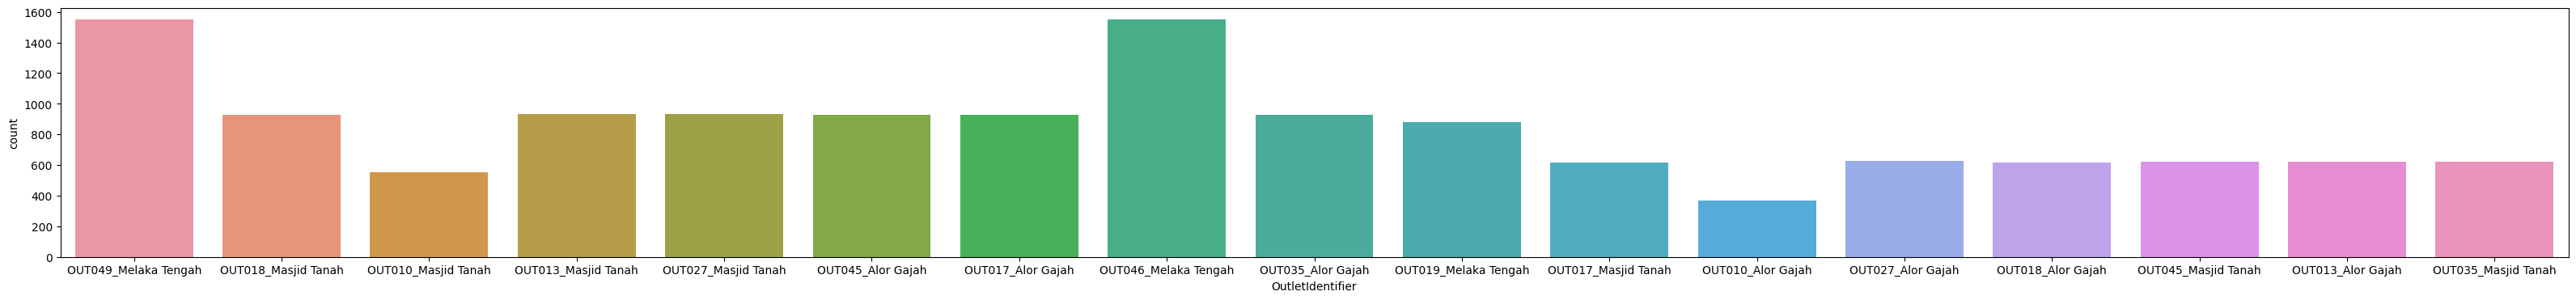

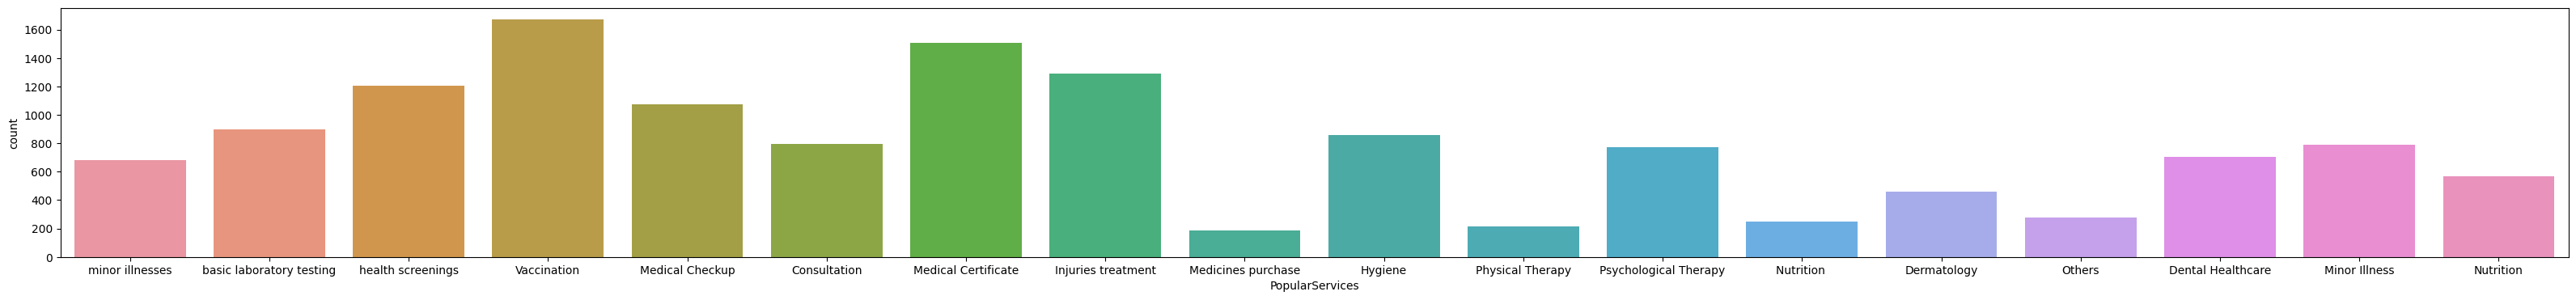

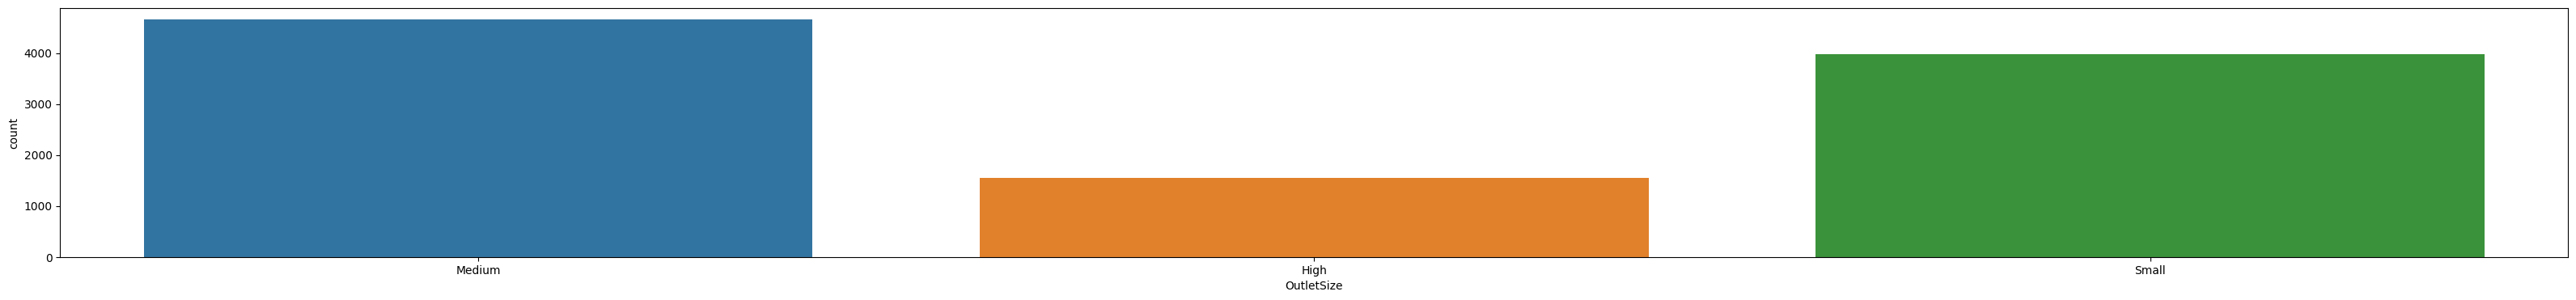

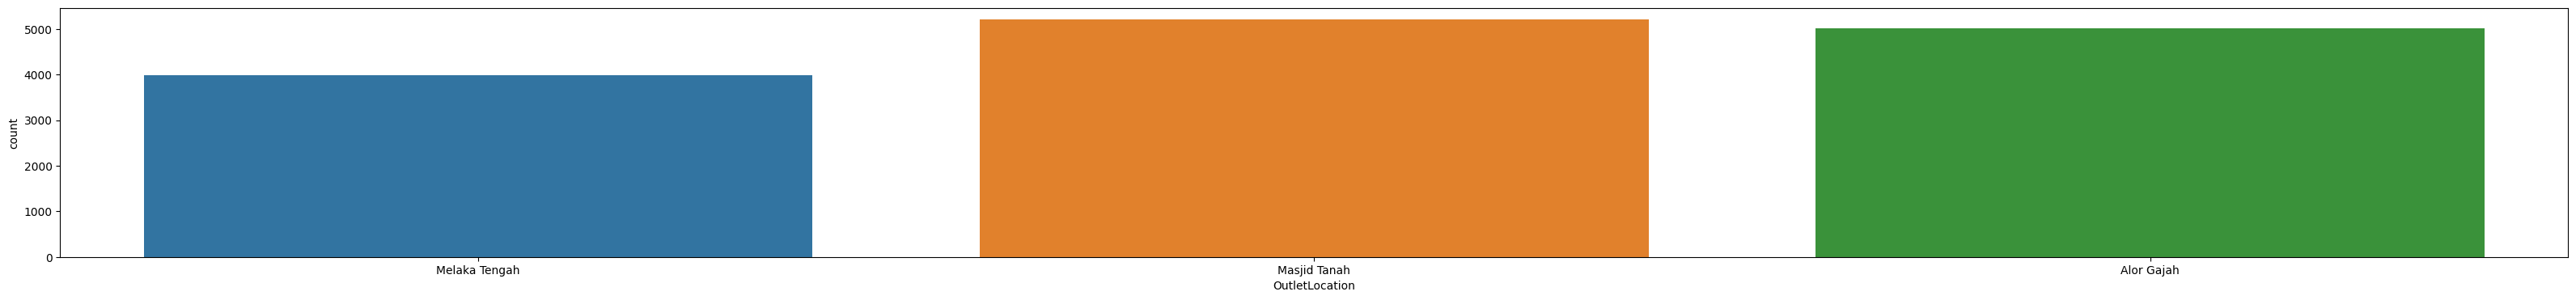

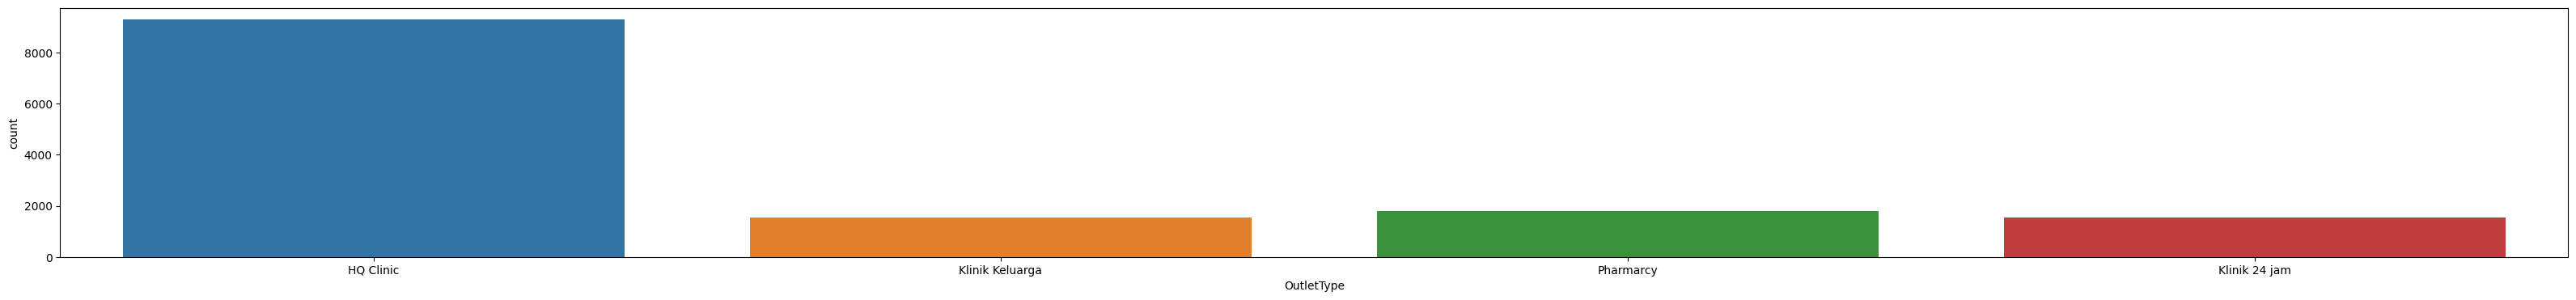

In [35]:
for column in categorical_columns:
    plt.figure(figsize=(40,4))
    sns.countplot(x=combined_df[column])
    plt.show()

<ipython-input-36-0775bd6bb2ae>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=combined_df, x=column, palette="crest")


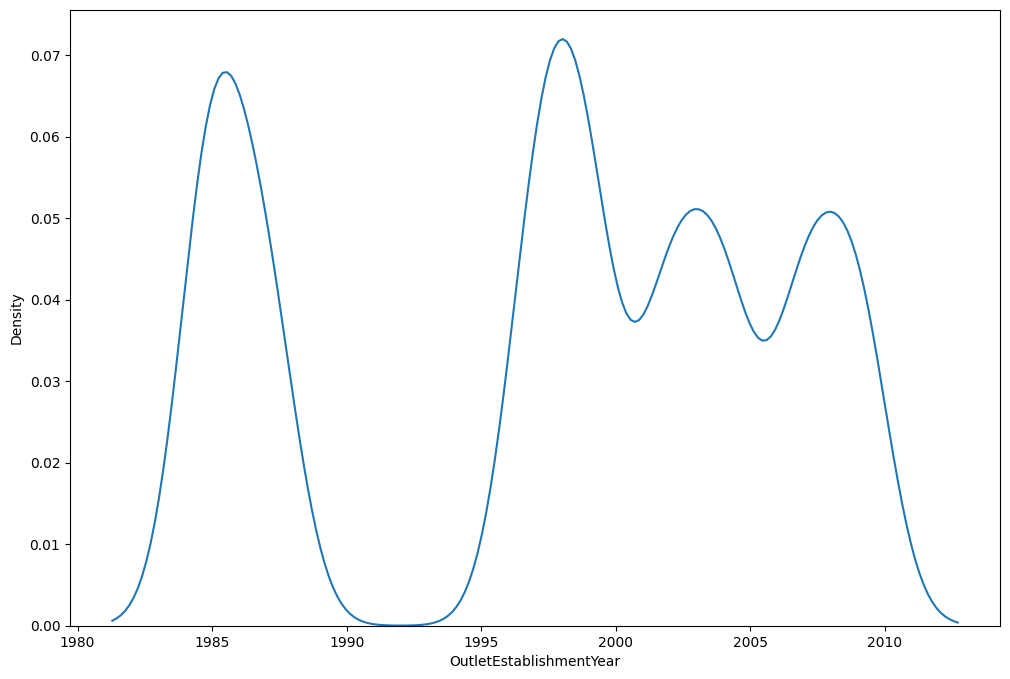

<ipython-input-36-0775bd6bb2ae>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=combined_df, x=column, palette="crest")


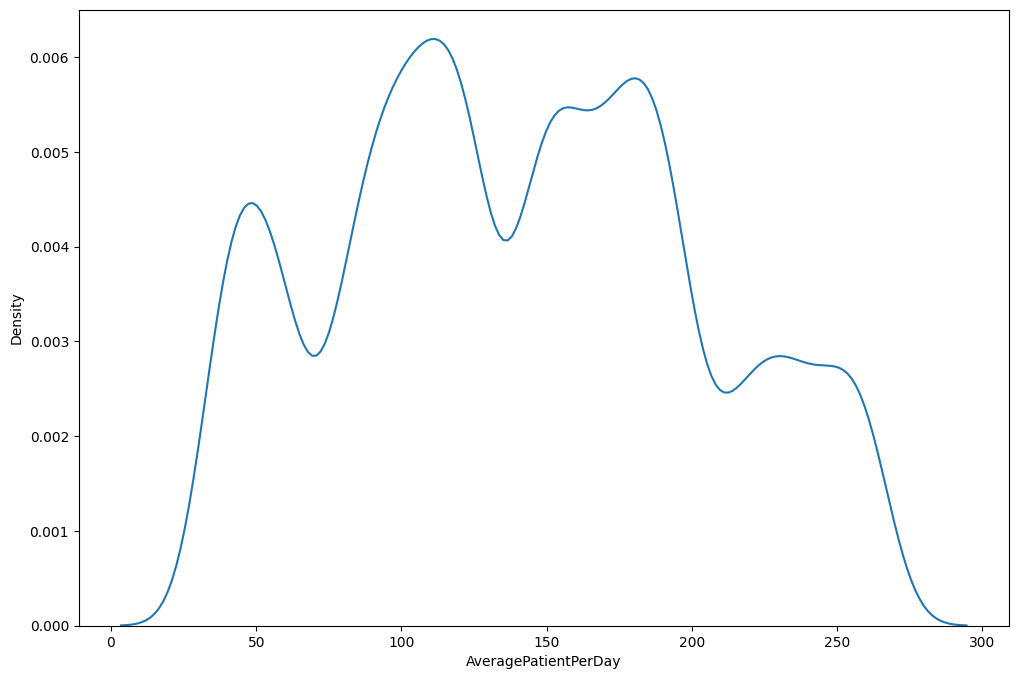

<ipython-input-36-0775bd6bb2ae>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=combined_df, x=column, palette="crest")


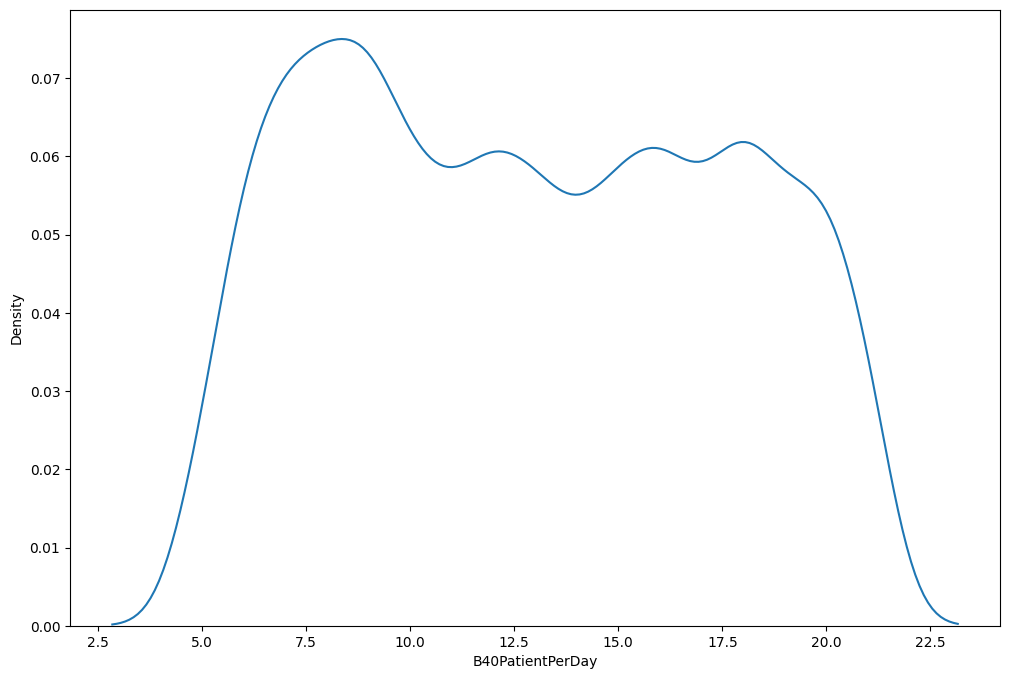

<ipython-input-36-0775bd6bb2ae>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=combined_df, x=column, palette="crest")


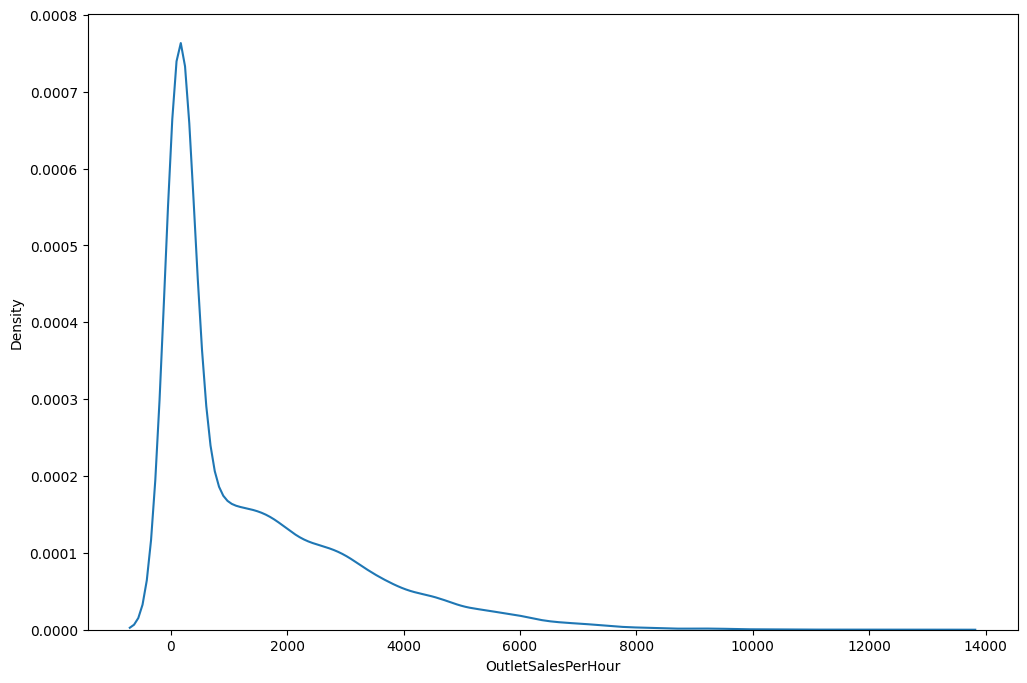

In [36]:
for column in numerical_columns:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=combined_df, x=column, palette="crest")
    plt.show()

<ipython-input-37-a552086fdac0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_df['OutletSalesPerHour']).set(title='OutletSalesPerHour')


[Text(0.5, 1.0, 'OutletSalesPerHour')]

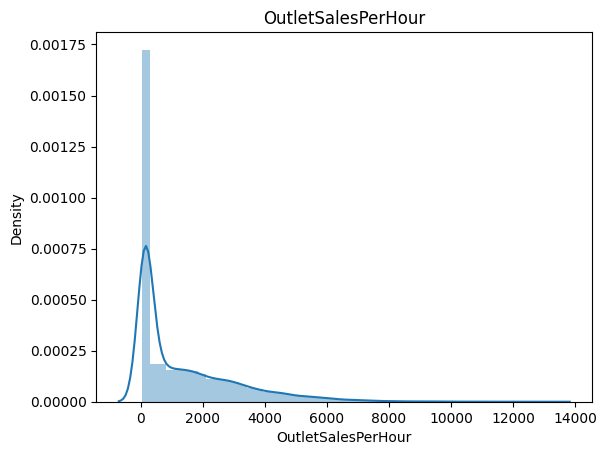

In [37]:
sns.distplot(combined_df['OutletSalesPerHour']).set(title='OutletSalesPerHour')

In [38]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['OutletIdentifier','PopularServices','OutletLocation','OutletType']

encoder = LabelEncoder()
for column in categorical_columns:
    combined_df[column] = encoder.fit_transform(combined_df[column])

In [39]:
from sklearn.preprocessing import OrdinalEncoder

# Identify the column(s) with missing values to be imputed
missing_column = ['OutletSize']

# Create an ordinal encoder to encode categorical variables
ordinal_encoder = OrdinalEncoder()

# Fit and transform the ordinal encoder on the dataset
combined_df[missing_column] = ordinal_encoder.fit_transform(combined_df[missing_column])

In [40]:
combined_df['OutletSize'].value_counts()

1.0    4655
2.0    3980
0.0    1553
Name: OutletSize, dtype: int64

In [41]:
combined_df['OutletIdentifier'].value_counts()

16    1550
15    1550
10     935
3      932
11     930
13     929
7      928
4      926
8      880
9      624
2      621
12     620
14     619
6      618
5      617
1      555
0      370
Name: OutletIdentifier, dtype: int64

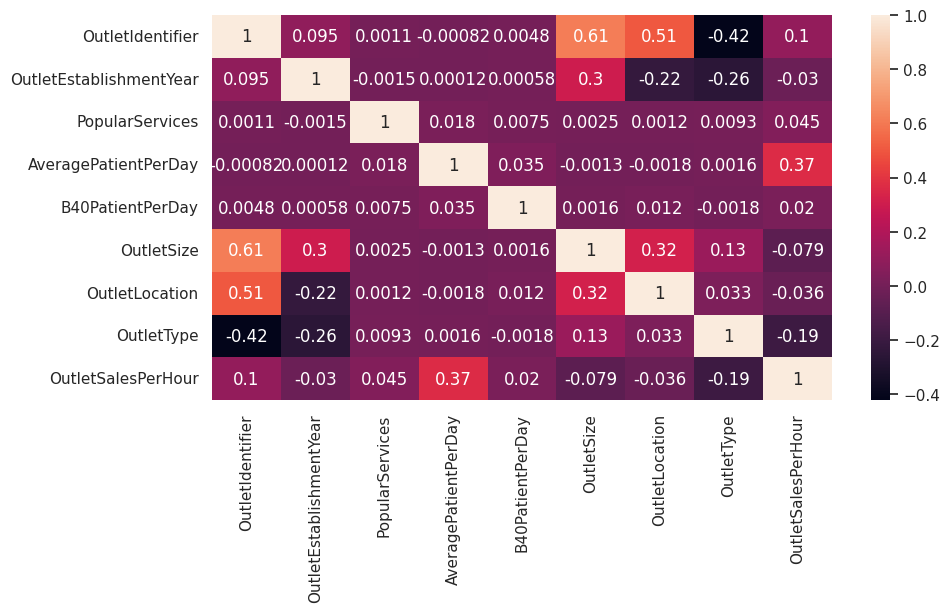

In [42]:
sns.set(rc = {'figure.figsize':(10,5)})
dataplot = sns.heatmap(combined_df.corr(),annot=True)

In [43]:
from sklearn.impute import KNNImputer

# Identify the column(s) to be used as predictors
missing_column = ['OutletSize']
predictor_columns = ['OutletIdentifier','OutletEstablishmentYear', 'OutletLocation', 'OutletType']

# Create a copy of the dataset with the predictor and missing value columns
selected_data = combined_df[predictor_columns + missing_column].copy()

# Apply KNN imputation to the selected data
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
imputed_values = imputer.fit_transform(selected_data)

# Replace the missing values in the original dataset with the imputed values
combined_df[missing_column] = imputed_values[:, len(predictor_columns):]

In [44]:
combined_df[combined_df['OutletIdentifier']==14]

,OutletIdentifier,OutletEstablishmentYear,PopularServices,AveragePatientPerDay,B40PatientPerDay,OutletSize,OutletLocation,OutletType,OutletSalesPerHour
8531,14,2002,8,96,6.0,2.0,1,0,95.74
8534,14,2002,16,85,7.0,2.0,1,0,85.39
8539,14,2002,5,199,20.0,2.0,1,0,198.78
8582,14,2002,15,90,10.0,2.0,1,0,90.15
8587,14,2002,9,153,6.0,2.0,1,0,152.70
...,...,...,...,...,...,...,...,...,...
14170,14,2002,5,44,9.0,2.0,1,0,43.81
14172,14,2002,15,95,17.0,2.0,1,0,94.71
14175,14,2002,16,127,7.0,2.0,1,0,126.77
14201,14,2002,3,119,10.0,2.0,1,0,118.74


In [45]:
combined_df[combined_df['OutletIdentifier']==4]

,OutletIdentifier,OutletEstablishmentYear,PopularServices,AveragePatientPerDay,B40PatientPerDay,OutletSize,OutletLocation,OutletType,OutletSalesPerHour
9,4,2007,4,188,19.0,1.0,0,0,4710.54
25,4,2007,6,46,13.0,1.0,0,0,838.91
53,4,2007,14,196,11.0,1.0,0,0,3121.27
54,4,2007,6,151,12.0,1.0,0,0,4815.07
73,4,2007,13,190,8.0,1.0,0,0,2285.03
...,...,...,...,...,...,...,...,...,...
8493,4,2007,5,189,7.0,1.0,0,0,4727.18
8494,4,2007,6,110,15.0,1.0,0,0,1637.87
8496,4,2007,1,185,7.0,1.0,0,0,3715.16
8500,4,2007,6,125,20.0,1.0,0,0,1907.52


In [46]:
from sklearn.ensemble import RandomForestRegressor

# Specify the columns for imputation
empty_column = 'B40PatientPerDay'

# Split the DataFrame into two parts: one with missing values and one without missing values
df_missing = combined_df[combined_df[empty_column].isna()]
df_not_missing = combined_df[~combined_df[empty_column].isna()]

X_train_imp = df_not_missing.drop(["OutletSalesPerHour", empty_column], axis=1)
y_train_imp = df_not_missing[empty_column]

# Initialize the regression model
regressor = RandomForestRegressor()
regressor.fit(X_train_imp, y_train_imp)

# Predict the missing values
X_missing_imp = df_missing.drop(["OutletSalesPerHour", empty_column], axis=1)
y_missing_imp = regressor.predict(X_missing_imp)

# Assign the predicted values to the missing positions in the DataFrame
combined_df.loc[df_missing.index, empty_column] = y_missing_imp

# Print the DataFrame with imputed values
print(combined_df)


       OutletIdentifier  OutletEstablishmentYear  PopularServices  \
0                    16                     1999               17   
1                     7                     2009               15   
2                    16                     1999               16   
3                     1                     1998               14   
4                     3                     1987                6   
...                 ...                      ...              ...   
14199                15                     1997                8   
14200                 6                     2009               13   
14201                14                     2002                3   
14202                 5                     2007                4   
14203                14                     2002                4   

       AveragePatientPerDay  B40PatientPerDay  OutletSize  OutletLocation  \
0                       250               9.0         1.0               2   
1                

In [47]:
combined_df['B40PatientPerDay'] = combined_df['B40PatientPerDay'].apply(lambda x: round(x, 0))

After filling missing value, split the dataset back to train set and test set then check for duplicates and outliers


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OutletIdentifier         8523 non-null   object 
 1   OutletEstablishmentYear  8523 non-null   int64  
 2   PopularServices          8523 non-null   object 
 3   AveragePatientPerDay     8523 non-null   int64  
 4   B40PatientPerDay         7060 non-null   float64
 5   OutletSize               6113 non-null   object 
 6   OutletLocation           8523 non-null   object 
 7   OutletType               8523 non-null   object 
 8   OutletSalesPerHour       8523 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 599.4+ KB


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OutletIdentifier         5681 non-null   object 
 1   OutletEstablishmentYear  5681 non-null   int64  
 2   PopularServices          5681 non-null   object 
 3   AveragePatientPerDay     5681 non-null   int64  
 4   B40PatientPerDay         4705 non-null   float64
 5   OutletSize               4075 non-null   object 
 6   OutletLocation           5681 non-null   object 
 7   OutletType               5681 non-null   object 
 8   OutletSalesPerHour       5681 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 399.6+ KB


In [50]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OutletIdentifier         14204 non-null  int64  
 1   OutletEstablishmentYear  14204 non-null  int64  
 2   PopularServices          14204 non-null  int64  
 3   AveragePatientPerDay     14204 non-null  int64  
 4   B40PatientPerDay         14204 non-null  float64
 5   OutletSize               14204 non-null  float64
 6   OutletLocation           14204 non-null  int64  
 7   OutletType               14204 non-null  int64  
 8   OutletSalesPerHour       14204 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 998.8 KB


In [51]:
train_set = combined_df.iloc[0:8523]
test_set = combined_df.iloc[8523:14204]

In [52]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OutletIdentifier         8523 non-null   int64  
 1   OutletEstablishmentYear  8523 non-null   int64  
 2   PopularServices          8523 non-null   int64  
 3   AveragePatientPerDay     8523 non-null   int64  
 4   B40PatientPerDay         8523 non-null   float64
 5   OutletSize               8523 non-null   float64
 6   OutletLocation           8523 non-null   int64  
 7   OutletType               8523 non-null   int64  
 8   OutletSalesPerHour       8523 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 599.4 KB


In [53]:
last_row = train_set.tail(1)
print(last_row)

      OutletIdentifier  OutletEstablishmentYear  PopularServices  \
8522                15                     1997               15   

      AveragePatientPerDay  B40PatientPerDay  OutletSize  OutletLocation  \
8522                    75              15.0         2.0               2   

      OutletType  OutletSalesPerHour  
8522           0              765.67  


In [54]:
first_row = test_set.head(1)
print(last_row)

      OutletIdentifier  OutletEstablishmentYear  PopularServices  \
8522                15                     1997               15   

      AveragePatientPerDay  B40PatientPerDay  OutletSize  OutletLocation  \
8522                    75              15.0         2.0               2   

      OutletType  OutletSalesPerHour  
8522           0              765.67  


In [55]:
train_set.duplicated().sum()

5

In [56]:
test_set.duplicated().sum()

3

In [57]:
train_set[train_set.duplicated()]

,OutletIdentifier,OutletEstablishmentYear,PopularServices,AveragePatientPerDay,B40PatientPerDay,OutletSize,OutletLocation,OutletType,OutletSalesPerHour
3777,10,1985,5,147,12.0,1.0,1,1,3368.95
5022,8,1985,0,121,15.0,2.0,2,3,120.51
5894,8,1985,16,98,12.0,2.0,2,3,198.41
7457,10,1985,0,196,14.0,1.0,1,1,5499.51
7750,8,1985,6,195,17.0,2.0,2,3,196.41


In [58]:
train_set = train_set.drop_duplicates()
test_set = test_set.drop_duplicates()

In [59]:
train_set.duplicated().sum()

0

In [60]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8518 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OutletIdentifier         8518 non-null   int64  
 1   OutletEstablishmentYear  8518 non-null   int64  
 2   PopularServices          8518 non-null   int64  
 3   AveragePatientPerDay     8518 non-null   int64  
 4   B40PatientPerDay         8518 non-null   float64
 5   OutletSize               8518 non-null   float64
 6   OutletLocation           8518 non-null   int64  
 7   OutletType               8518 non-null   int64  
 8   OutletSalesPerHour       8518 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 665.5 KB


In [61]:
test_set.duplicated().sum()

0

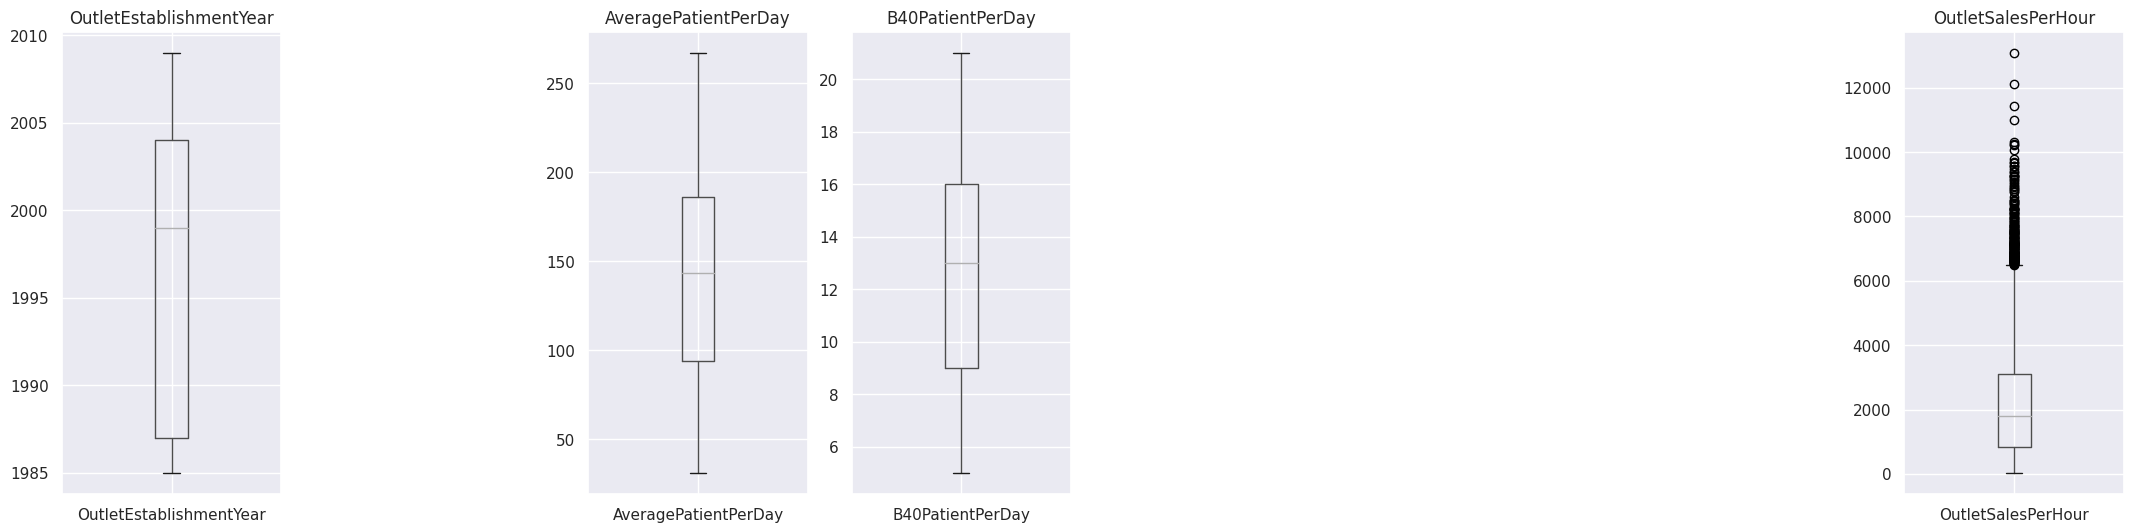

In [62]:
# Create a boxplot for each column
plt.figure(figsize=(30, 6))

for column in numerical_columns:
    plt.subplot(1, len(train_set.columns), list(train_set.columns).index(column) + 1)
    train_set.boxplot(column=column)
    plt.title(column)

plt.show()

Used boxplot to check for outlier in numerical feature for train set

In [63]:
train_set['PopularServices'].value_counts()

14    1232
5     1199
6      909
4      856
17     682
13     649
0      646
3      520
15     445
16     424
10     251
12     214
11     169
2      148
7      110
1       64
Name: PopularServices, dtype: int64

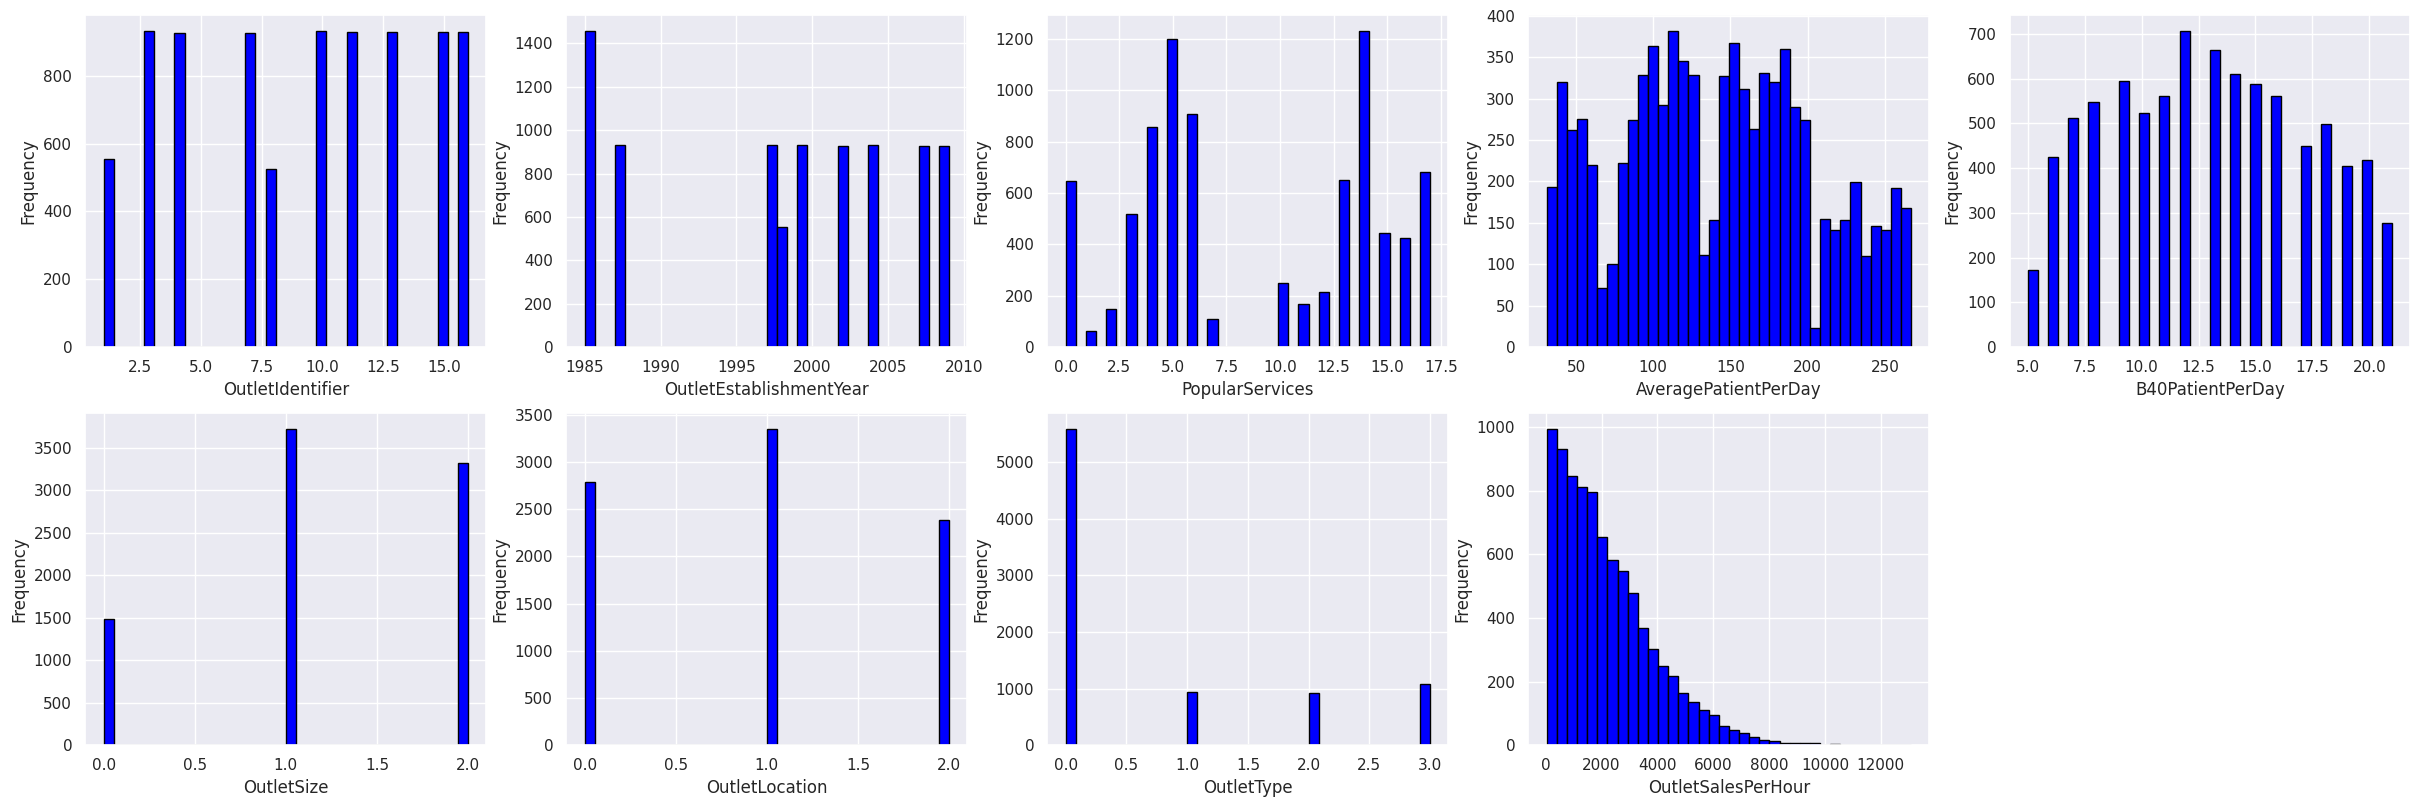

In [64]:
plt.figure(figsize=[30,25])
x = range(7)
for n in x:
    for (column_name, column) in train_set.transpose().iterrows():
        n= n+1
        ax = plt.subplot(5, 5, n)
        ax.hist(column, color = 'blue', edgecolor = 'black', bins = int(180/5))
        ax.set_xlabel(column_name)
        ax.set_ylabel('Frequency')
    if n >= 7:
        break

The data in OutletSalesPerHour column in the train set will be used as threshold range. Based on the barchart, it is suitable as it has a consistent positively skewed data.

After addressing missing, duplicated and outliers, the clean train and test set is exported.

In [65]:
train_set_clean = train_set.copy()
train_set_clean[missing_column] = ordinal_encoder.inverse_transform(train_set[missing_column].astype(int))
test_set_clean = test_set.copy()
test_set_clean[missing_column] = ordinal_encoder.inverse_transform(test_set[missing_column].astype(int))

In [66]:
"""from google.colab import files
train_set_clean.to_csv('train_set_clean.csv', index=False)
files.download('train_set_clean.csv')"""

"from google.colab import files\ntrain_set_clean.to_csv('train_set_clean.csv', index=False)\nfiles.download('train_set_clean.csv')"

In [67]:
"""from google.colab import files
test_set_clean.to_csv('test_set_clean.csv', index=False)
files.download('test_set_clean.csv')"""

"from google.colab import files\ntest_set_clean.to_csv('test_set_clean.csv', index=False)\nfiles.download('test_set_clean.csv')"

In [68]:
combined_df['OutletSalesPerHour'].mean()

1365.2689531117996

In [69]:
combined_df['OutletSalesPerHour'].std()

1657.688996017712

In [70]:
train_set['OutletSalesPerHour'].mean()

2181.4678093449165

In [71]:
test_set['OutletSalesPerHour'].mean()

141.00340260655162

In [72]:
# Determine the thresholds for categorization
high_threshold = train_set['OutletSalesPerHour'].quantile(0.75)
low_threshold = train_set['OutletSalesPerHour'].quantile(0.25)

In [73]:
print(low_threshold)

834.91


In [74]:
print(high_threshold)

3100.965


In [75]:
# Categorize "OutletSalesPerHour" based on the thresholds
train_set['OutletSalesPerHour'] = pd.cut(train_set['OutletSalesPerHour'],
                                  bins=[float('-inf'), (low_threshold), (high_threshold), float('inf')],
                                  labels=['Low', 'Medium', 'High'],
                                  include_lowest=True)

In [76]:
# Categorize "OutletSalesPerHour" based on the thresholds
test_set['OutletSalesPerHour'] = pd.cut(test_set['OutletSalesPerHour'],
                                  bins=[float('-inf'), (low_threshold), (high_threshold), float('inf')],
                                  labels=['Low', 'Medium', 'High'],
                                  include_lowest=True)

In [77]:
train_set['OutletSalesPerHour'].value_counts()

Medium    4255
Low       2133
High      2130
Name: OutletSalesPerHour, dtype: int64

In [78]:
test_set['OutletSalesPerHour'].value_counts()

Low       5678
Medium       0
High         0
Name: OutletSalesPerHour, dtype: int64

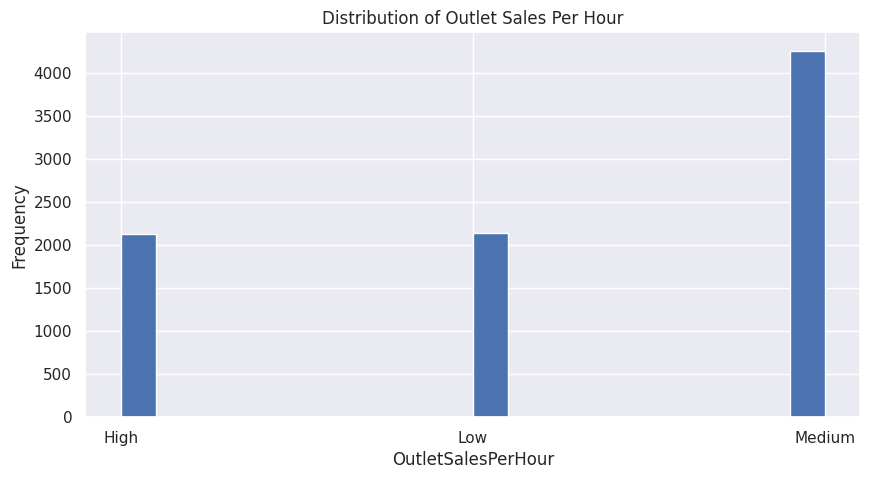

In [79]:
# Create a histogram of the transformed data
plt.hist(train_set['OutletSalesPerHour'], bins=20)

# Set labels and title
plt.xlabel('OutletSalesPerHour')
plt.ylabel('Frequency')
plt.title('Distribution of Outlet Sales Per Hour')

# Display the plot
plt.show()

In [80]:
train_set = train_set.drop_duplicates()
test_set = test_set.drop_duplicates()

In [81]:
test_set.duplicated().sum()

0

In [82]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5559 entries, 8523 to 14203
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   OutletIdentifier         5559 non-null   int64   
 1   OutletEstablishmentYear  5559 non-null   int64   
 2   PopularServices          5559 non-null   int64   
 3   AveragePatientPerDay     5559 non-null   int64   
 4   B40PatientPerDay         5559 non-null   float64 
 5   OutletSize               5559 non-null   float64 
 6   OutletLocation           5559 non-null   int64   
 7   OutletType               5559 non-null   int64   
 8   OutletSalesPerHour       5559 non-null   category
dtypes: category(1), float64(2), int64(6)
memory usage: 396.4 KB


In [83]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8304 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   OutletIdentifier         8304 non-null   int64   
 1   OutletEstablishmentYear  8304 non-null   int64   
 2   PopularServices          8304 non-null   int64   
 3   AveragePatientPerDay     8304 non-null   int64   
 4   B40PatientPerDay         8304 non-null   float64 
 5   OutletSize               8304 non-null   float64 
 6   OutletLocation           8304 non-null   int64   
 7   OutletType               8304 non-null   int64   
 8   OutletSalesPerHour       8304 non-null   category
dtypes: category(1), float64(2), int64(6)
memory usage: 592.1 KB


In [84]:
test_set['OutletSalesPerHour'].value_counts()

Low       5559
Medium       0
High         0
Name: OutletSalesPerHour, dtype: int64

In [85]:
from imblearn.over_sampling import SMOTE

target_column = ['OutletSalesPerHour']

X = train_set.drop(['OutletSalesPerHour'], axis=1)
y = train_set[target_column]

# Instantiate the SMOTE algorithm
sm = SMOTE(random_state=42)

# Perform SMOTE on the dataset
X_trainset, y_trainset = sm.fit_resample(X, y)

# Print the original and resampled class distribution
print('Original dataset shape:', y.shape)
print('Resampled dataset shape:', y_trainset.shape)
print('Class distribution before resampling:\n', y.value_counts())
print('Class distribution after resampling:\n', y_trainset.value_counts())

Original dataset shape: (8304, 1)
Resampled dataset shape: (12537, 1)
Class distribution before resampling:
 OutletSalesPerHour
Medium                4179
Low                   2071
High                  2054
dtype: int64
Class distribution after resampling:
 OutletSalesPerHour
Low                   4179
Medium                4179
High                  4179
dtype: int64


<Axes: >

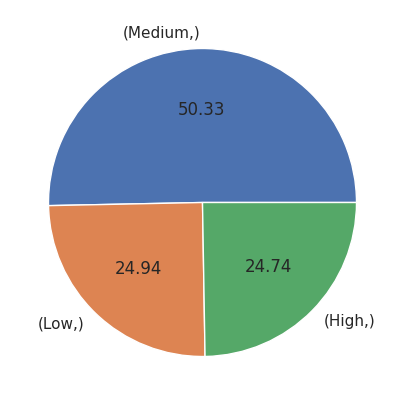

In [86]:
y.value_counts().plot.pie(autopct='%.2f')

In [87]:
#y_trainset.value_counts().plot.pie(autopct='%.2f')

In [88]:
# Test set
X_test = test_set.drop(["OutletSalesPerHour"], axis=1)
y_test = test_set[target_column]

In [89]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score
from sklearn import metrics

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_trainset, y_trainset, test_size=0.2, random_state=42, stratify=y_trainset)

In [91]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(random_state=42, n_estimators=80, class_weight='balanced')
y_train = y_train.values.ravel()
rfc_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=80,
                       random_state=42)

In [92]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the validation set
y_val_pred = rfc_model.predict(X_val)

# Calculate accuracy and generate classification report for the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)
print("\nTrain dataset (Combined dataset) result: ")
print(val_accuracy)
print(val_classification_rep)

# Predict on the test set
y_test_pred = rfc_model.predict(X_test)

# Calculate accuracy and generate classification report for the test set
print("\nTest dataset result: ")
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)
print(test_accuracy)
print(test_classification_rep)


Train dataset (Combined dataset) result: 
0.7814992025518341
              precision    recall  f1-score   support

        High       0.76      0.81      0.79       836
         Low       0.88      0.86      0.87       836
      Medium       0.70      0.67      0.69       836

    accuracy                           0.78      2508
   macro avg       0.78      0.78      0.78      2508
weighted avg       0.78      0.78      0.78      2508


Test dataset result: 
0.5038676020867062
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         0
         Low       1.00      0.50      0.67      5559
      Medium       0.00      0.00      0.00         0

    accuracy                           0.50      5559
   macro avg       0.33      0.17      0.22      5559
weighted avg       1.00      0.50      0.67      5559



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


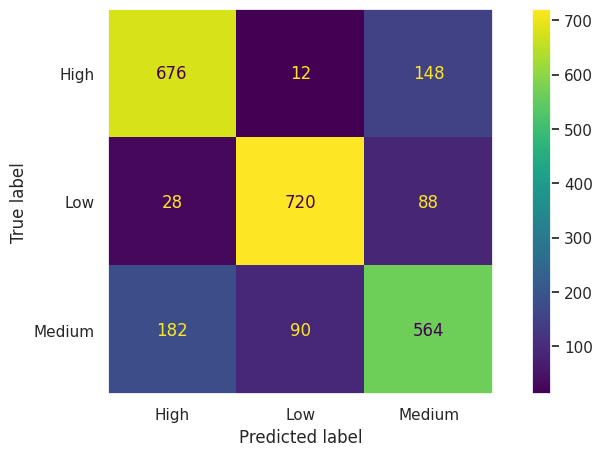

Text(0.5, 1.0, 'Random Forest Classifier Model')

In [93]:
# Another way to visualise confusion matrix
rfc_cm = confusion_matrix(y_val,y_val_pred)
rfc_cm_disp = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=["High", "Low", "Medium"])
rfc_cm_disp.plot(ax=None)
plt.grid(False)
plt.show()
plt.rcParams['axes.grid'] = False
rfc_cm_disp.ax_.set_title("Random Forest Classifier Model")

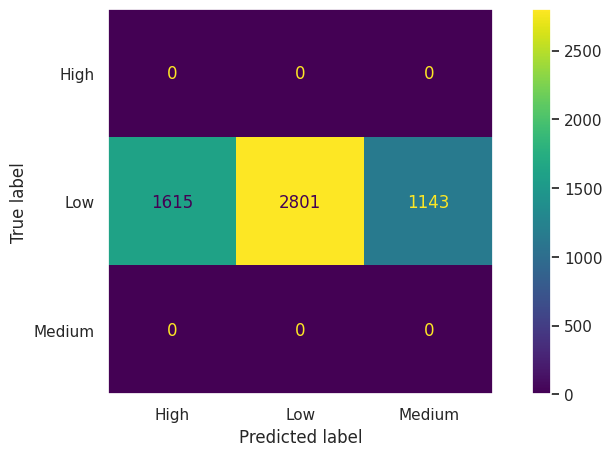

Text(0.5, 1.0, 'Random Forest Classifier Model')

In [94]:
# Another way to visualise confusion matrix
rfc_cm = confusion_matrix(y_test,y_test_pred)
rfc_cm_disp = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=["High", "Low", "Medium"])
rfc_cm_disp.plot(ax=None)
plt.grid(False)
plt.show()
plt.rcParams['axes.grid'] = False
rfc_cm_disp.ax_.set_title("Random Forest Classifier Model")

In [95]:
rfc_model.feature_importances_

array([0.06794467, 0.05066302, 0.11536021, 0.45812793, 0.15998901,
       0.0299013 , 0.01282008, 0.10519378])

<BarContainer object of 8 artists>

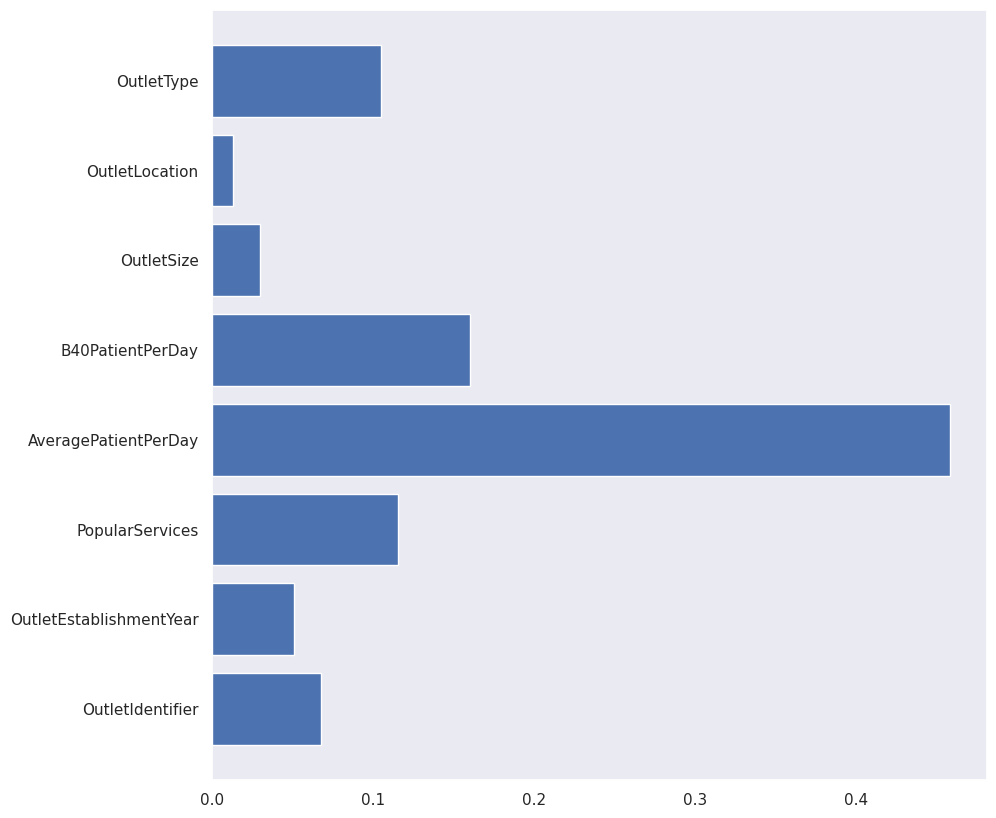

In [96]:
plt.figure(figsize=[10,10])
plt.barh(X_trainset.columns, rfc_model.feature_importances_)